## Data

Skin Cancer MNIST: HAM10000
https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000

## Feature columns : 
- **lesion_id**: All images with the same lesion_id are of the same lesion.
- **image_id** : each image reference number and location in the file that has all the lesion types images 
- **dx** : type of skin lesion or skin cancer present in the image.  nv: 'Melanocytic nevi', mel: 'Melanoma', bkl: 'Benign keratosis-like lesions ', bcc: 'Basal cell carcinoma', akiec: 'Actinic keratoses', vasc: 'Vascular lesions', df: 'Dermatofibroma'
- **dx_type**: the method by which the diagnosis was confirmed. 'histo' for histopathology (microscopic examination)
- **age** : The age of the patient. 
- **sex** : The gender of the patient.
- **localization** : The location of the skin lesion on the body.

## Import libraries and load the dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from glob import glob
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
HAM10= pd.read_csv('HAM10000_metadata.csv')
HAM10

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


## Exploratory Data Analysis

### Initial Exploration:

In [3]:
HAM10.shape

(10015, 7)

In [4]:
HAM10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


### Visualize the raw dataset
To help get a visual insight of how the data looks like and if there are any visual relationships between features 

##### Statistical analysis using Describe function (Data Quality report)

In [5]:
#for countines data
HAM10.describe(include=['number'])

,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


Text(0, 0.5, 'Frequency count')

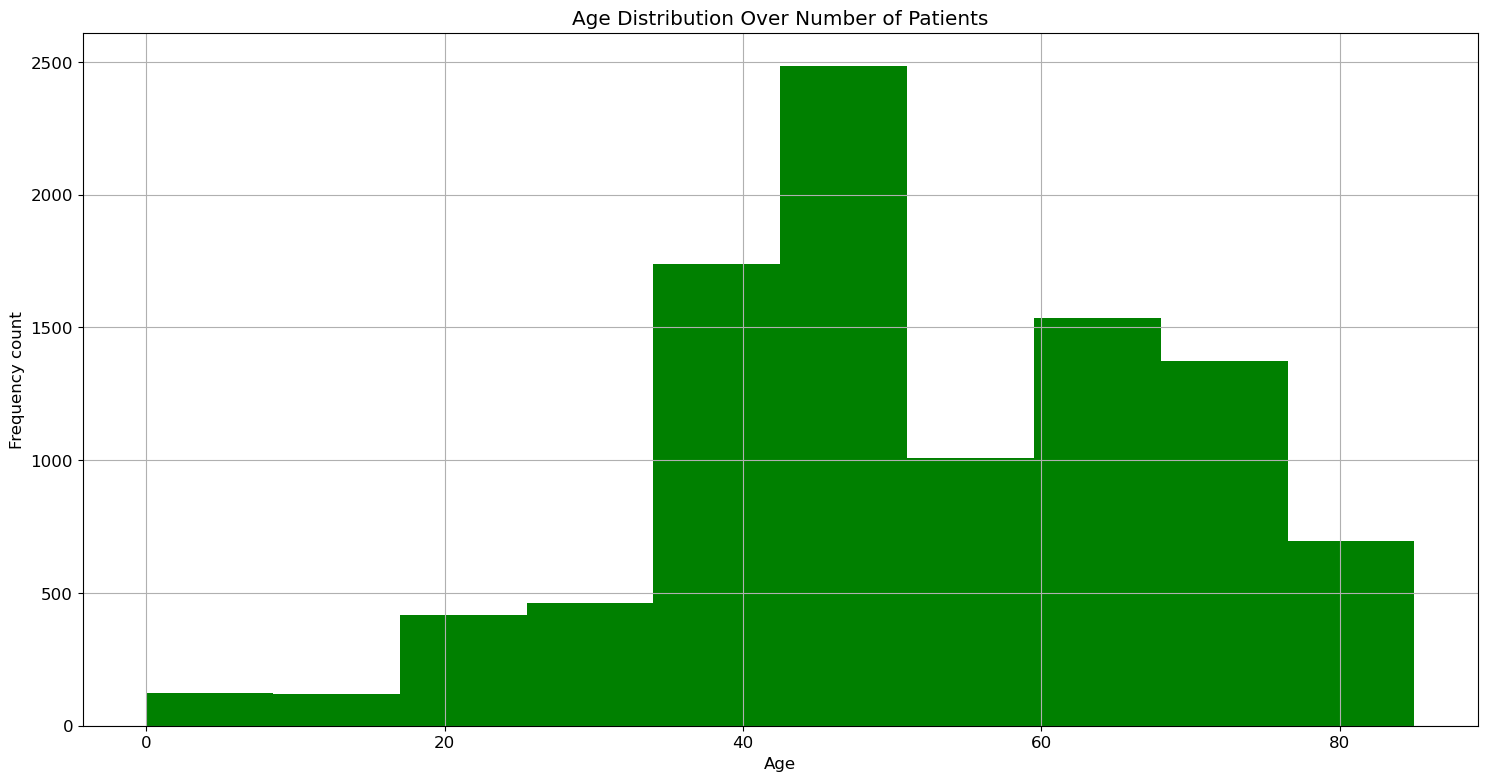

In [6]:
plt.rcParams["figure.figsize"] = [18, 9]
plt.rcParams["font.size"] = 12

#visualization
HAM10.hist(column=['age'], color = 'green');

plt.title('Age Distribution Over Number of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency count')

# Note:  which appear to be in the ranges of 30-40, 40-50, and 60-70, indicating these are the most common age groups in the dataset.

In [7]:
# Data quality report for Categorical values
# Exclude specific column (for example, excluding 'column_to_exclude')
column_to_exclude = 'age'
HAM_cat = HAM10.drop(columns=[column_to_exclude]).describe(exclude=['number'])
HAM_cat

,lesion_id,image_id,dx,dx_type,sex,localization
count,10015,10015,10015,10015,10015,10015
unique,7470,10015,7,4,3,15
top,HAM_0003789,ISIC_0027419,nv,histo,male,back
freq,6,1,6705,5340,5406,2192


Text(0, 0.5, 'Number of Cases')

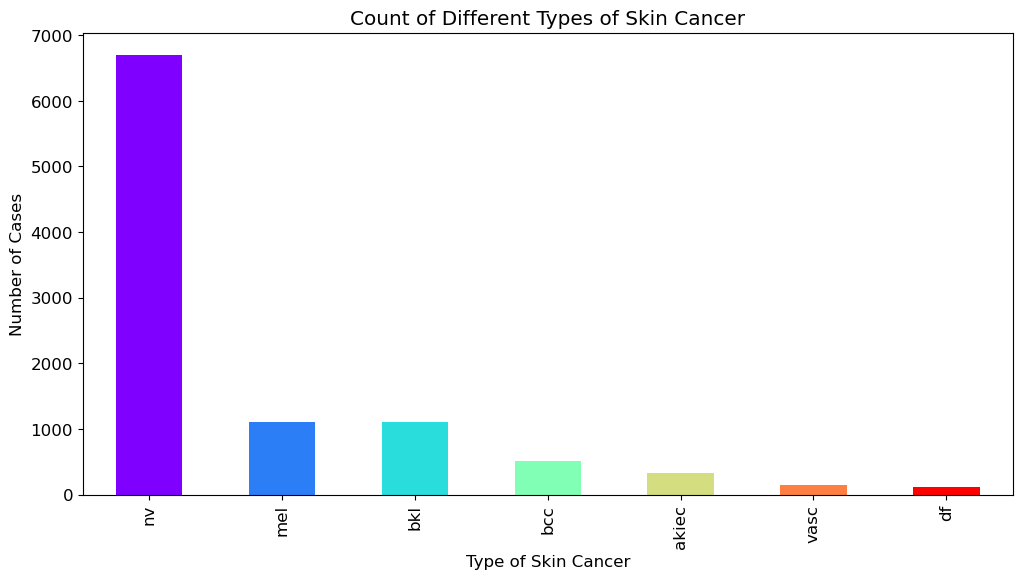

In [8]:
plt.figure(figsize=(12, 6))

colors = plt.cm.rainbow(np.linspace(0, 1, HAM10['dx'].nunique()))

# Create a bar chart
HAM10['dx'].value_counts().plot.bar(color=colors)

# Add a title and labels to the axes
plt.title('Count of Different Types of Skin Cancer')
plt.xlabel('Type of Skin Cancer')
plt.ylabel('Number of Cases')

Text(0, 0.5, 'Number of Cases')

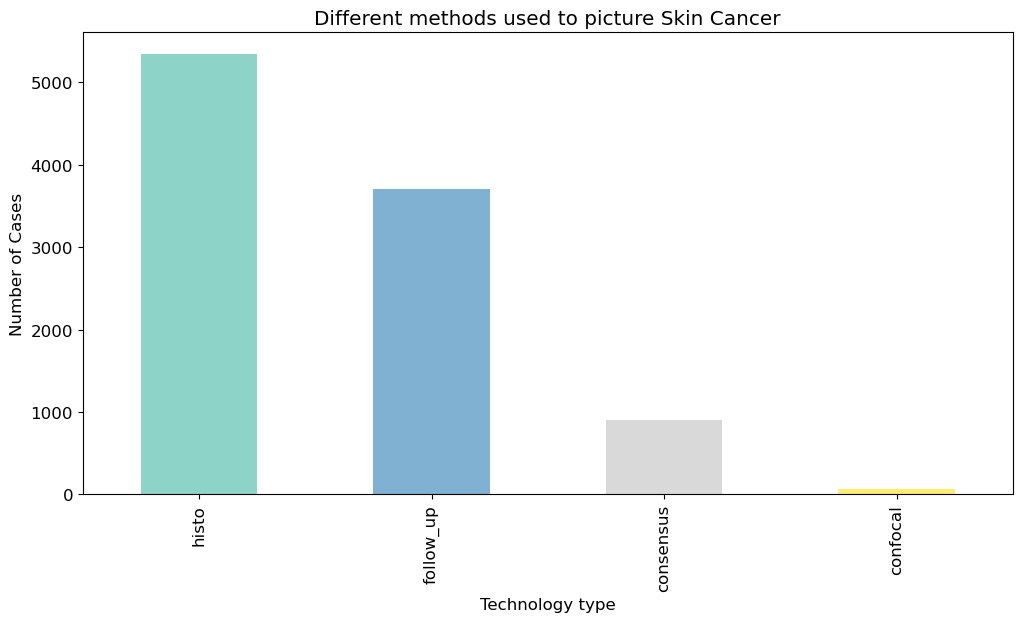

In [9]:
plt.figure(figsize=(12, 6))

colors = plt.cm.Set3(np.linspace(0, 1, HAM10['dx_type'].nunique()))

# Create a bar chart
HAM10['dx_type'].value_counts().plot.bar(color=colors)

# Add a title and labels to the axes
plt.title('Different methods used to picture Skin Cancer')
plt.xlabel('Technology type')
plt.ylabel('Number of Cases')

Text(0, 0.5, 'Number of Cases')

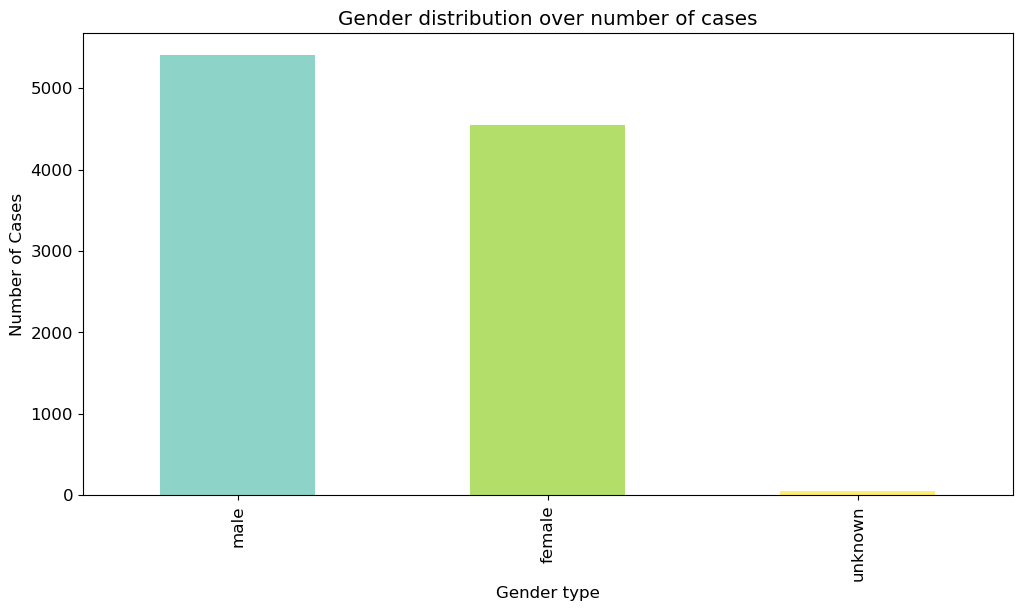

In [10]:
plt.figure(figsize=(12, 6))

colors = plt.cm.Set3(np.linspace(0, 1, HAM10['sex'].nunique()))

# Create a bar chart
HAM10['sex'].value_counts().plot.bar(color=colors)

# Add a title and labels to the axes
plt.title('Gender distribution over number of cases')
plt.xlabel('Gender type')
plt.ylabel('Number of Cases')

Text(0, 0.5, 'Number of Cases')

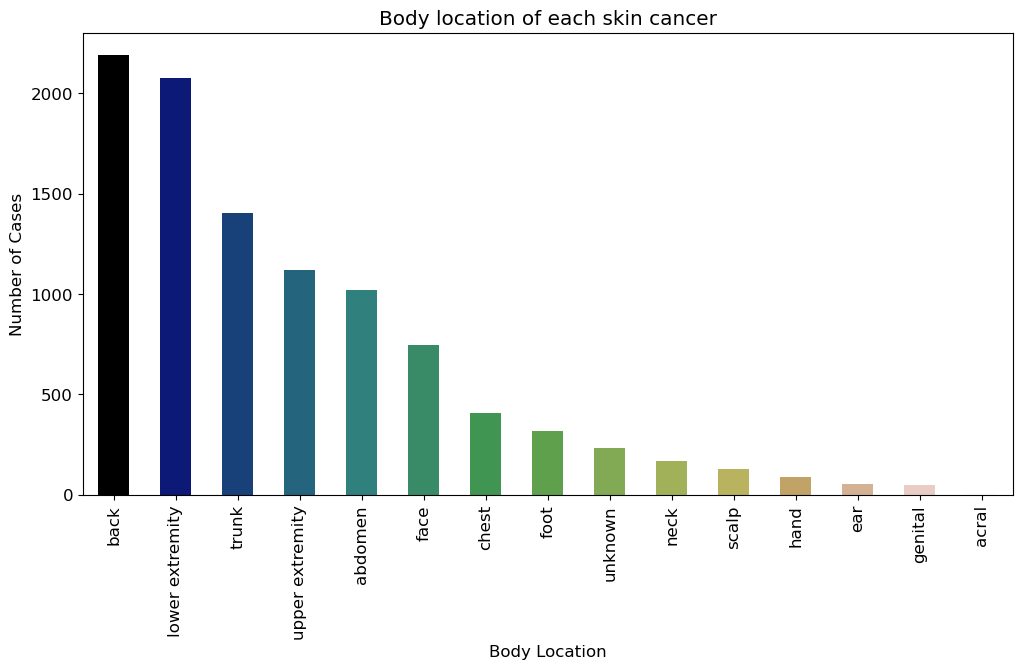

In [11]:
plt.figure(figsize=(12, 6))

colors = plt.cm.gist_earth(np.linspace(0, 1, HAM10['localization'].nunique()))

# Create a bar chart
HAM10['localization'].value_counts().plot.bar(color=colors)

# Add a title and labels to the axes
plt.title('Body location of each skin cancer')
plt.xlabel('Body Location')
plt.ylabel('Number of Cases')

## Check null values and add a solution 

In [12]:
null=HAM10.isnull().sum()
null

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [13]:
age_mean = HAM10['age'].mean()

HAM10['age'].fillna(age_mean, inplace=True)

null_ch2=HAM10.isnull().sum()
null_ch2

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

only age feature has missing values so we will replace it with the mean of ages because this will help us at least find the common age range later. 

#### Image preprocessing: 

In [14]:
import os
import pandas as pd

dirc = '../Project/'
allimages = os.path.join(dirc, 'All_imagesHAM')

# image files from the 'All_imagesHAM' directory
image_files = [os.path.join(allimages, filename) for filename in os.listdir(allimages)]

# add a new column called img_path and match the same image id with the right path 
HAM10['img_path'] = HAM10['image_id'].map({os.path.splitext(os.path.basename(path))[0]: path for path in image_files})
HAM10


,lesion_id,image_id,dx,dx_type,age,sex,localization,img_path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../Project/All_imagesHAM\ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../Project/All_imagesHAM\ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../Project/All_imagesHAM\ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../Project/All_imagesHAM\ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../Project/All_imagesHAM\ISIC_0031633.jpg
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,../Project/All_imagesHAM\ISIC_0033084.jpg
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,../Project/All_imagesHAM\ISIC_0033550.jpg
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,../Project/All_imagesHAM\ISIC_0033536.jpg
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,../Project/All_imagesHAM\ISIC_0032854.jpg


In [15]:
HAM10['image'] = HAM10['img_path'].map(lambda x: np.asarray(Image.open(x).resize((32,32))))
HAM10.head(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization,img_path,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../Project/All_imagesHAM\ISIC_0027419.jpg,"[[[191, 152, 192], [194, 154, 193], [196, 152,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../Project/All_imagesHAM\ISIC_0025030.jpg,"[[[24, 14, 29], [56, 39, 64], [106, 80, 112], ..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../Project/All_imagesHAM\ISIC_0026769.jpg,"[[[190, 136, 150], [199, 145, 161], [200, 141,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../Project/All_imagesHAM\ISIC_0025661.jpg,"[[[35, 18, 28], [83, 51, 64], [128, 88, 103], ..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../Project/All_imagesHAM\ISIC_0031633.jpg,"[[[155, 110, 135], [188, 139, 168], [210, 157,..."
5,HAM_0001466,ISIC_0027850,bkl,histo,75.0,male,ear,../Project/All_imagesHAM\ISIC_0027850.jpg,"[[[7, 1, 3], [16, 4, 9], [25, 8, 14], [26, 8, ..."
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face,../Project/All_imagesHAM\ISIC_0029176.jpg,"[[[194, 147, 137], [195, 148, 139], [198, 149,..."
7,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face,../Project/All_imagesHAM\ISIC_0029068.jpg,"[[[160, 119, 102], [168, 128, 118], [170, 128,..."
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back,../Project/All_imagesHAM\ISIC_0025837.jpg,"[[[122, 82, 82], [158, 109, 112], [179, 120, 1..."
9,HAM_0005132,ISIC_0025209,bkl,histo,70.0,female,back,../Project/All_imagesHAM\ISIC_0025209.jpg,"[[[228, 179, 195], [228, 175, 192], [226, 168,..."


In [16]:
#normalize the image dataset 
HAM10['image'] = HAM10['image'].apply(lambda x: x / 255)

In [17]:
uni_disease= HAM10['dx'].unique()
uni_disease

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

In [18]:
total = HAM10['dx'].value_counts()
total

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

## Note: 
The data seems unbalanced because we have 6705 identified ad Nv however, only 115 difened ad 115. So we will try later to balance the dataset using over-sampling for the large class and undersampling for smaller classes to prevent the model from being biased.

In [19]:
#use encoding to replace type of skin cancer with numirc values 0-6
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
HAM10['dx_enc'] = encode.fit_transform(HAM10['dx'])

HAM10

,lesion_id,image_id,dx,dx_type,age,sex,localization,img_path,image,dx_enc
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../Project/All_imagesHAM\ISIC_0027419.jpg,"[[[0.7490196078431373, 0.596078431372549, 0.75...",2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../Project/All_imagesHAM\ISIC_0025030.jpg,"[[[0.09411764705882353, 0.054901960784313725, ...",2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../Project/All_imagesHAM\ISIC_0026769.jpg,"[[[0.7450980392156863, 0.5333333333333333, 0.5...",2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../Project/All_imagesHAM\ISIC_0025661.jpg,"[[[0.13725490196078433, 0.07058823529411765, 0...",2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../Project/All_imagesHAM\ISIC_0031633.jpg,"[[[0.6078431372549019, 0.43137254901960786, 0....",2
...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,../Project/All_imagesHAM\ISIC_0033084.jpg,"[[[0.7098039215686275, 0.6431372549019608, 0.7...",0
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,../Project/All_imagesHAM\ISIC_0033550.jpg,"[[[0.01568627450980392, 0.0196078431372549, 0....",0
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,../Project/All_imagesHAM\ISIC_0033536.jpg,"[[[0.5176470588235295, 0.4666666666666667, 0.4...",0
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,../Project/All_imagesHAM\ISIC_0032854.jpg,"[[[0.6274509803921569, 0.4823529411764706, 0.5...",0


In [20]:
uni_loc= HAM10['localization'].unique()
uni_loc
#hote enode locations : 
#['scalp' =0 , 'ear' = 1, 'face'=2, 'back'=3, 'trunk'=4, 'chest'=5,
#      'upper extremity'=6, 'abdomen'=7, 'unknown'=8, 'lower extremity'=9,
#      'genital'=10, 'neck'=11, 'hand'=12, 'foot'=13, 'acral'=14]

encode = LabelEncoder()
HAM10['localization'] = encode.fit_transform(HAM10['localization'])

HAM10


,lesion_id,image_id,dx,dx_type,age,sex,localization,img_path,image,dx_enc
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,11,../Project/All_imagesHAM\ISIC_0027419.jpg,"[[[0.7490196078431373, 0.596078431372549, 0.75...",2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,11,../Project/All_imagesHAM\ISIC_0025030.jpg,"[[[0.09411764705882353, 0.054901960784313725, ...",2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,11,../Project/All_imagesHAM\ISIC_0026769.jpg,"[[[0.7450980392156863, 0.5333333333333333, 0.5...",2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,11,../Project/All_imagesHAM\ISIC_0025661.jpg,"[[[0.13725490196078433, 0.07058823529411765, 0...",2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,4,../Project/All_imagesHAM\ISIC_0031633.jpg,"[[[0.6078431372549019, 0.43137254901960786, 0....",2
...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,0,../Project/All_imagesHAM\ISIC_0033084.jpg,"[[[0.7098039215686275, 0.6431372549019608, 0.7...",0
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,0,../Project/All_imagesHAM\ISIC_0033550.jpg,"[[[0.01568627450980392, 0.0196078431372549, 0....",0
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,0,../Project/All_imagesHAM\ISIC_0033536.jpg,"[[[0.5176470588235295, 0.4666666666666667, 0.4...",0
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,5,../Project/All_imagesHAM\ISIC_0032854.jpg,"[[[0.6274509803921569, 0.4823529411764706, 0.5...",0


## Visualization: 
See how the data looks like before we start 

##  Cancer type and gender

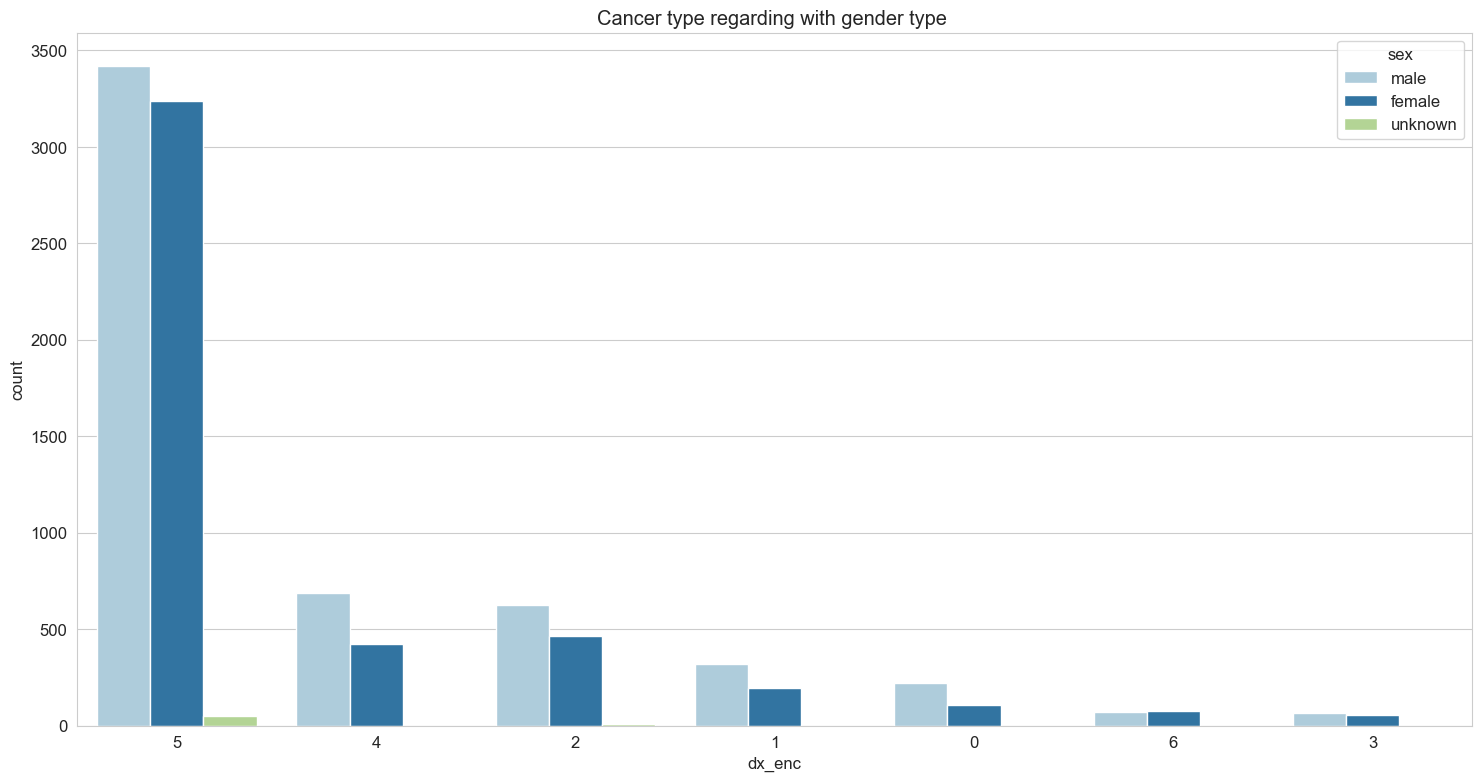

In [21]:
sns.set_style('whitegrid')

ax = sns.countplot(x='dx_enc',hue='sex', data=HAM10, order = HAM10['dx_enc'].value_counts().index, palette = 'Paired')

plt.title('Cancer type regarding with gender type ')
plt.show()

## Location and gender

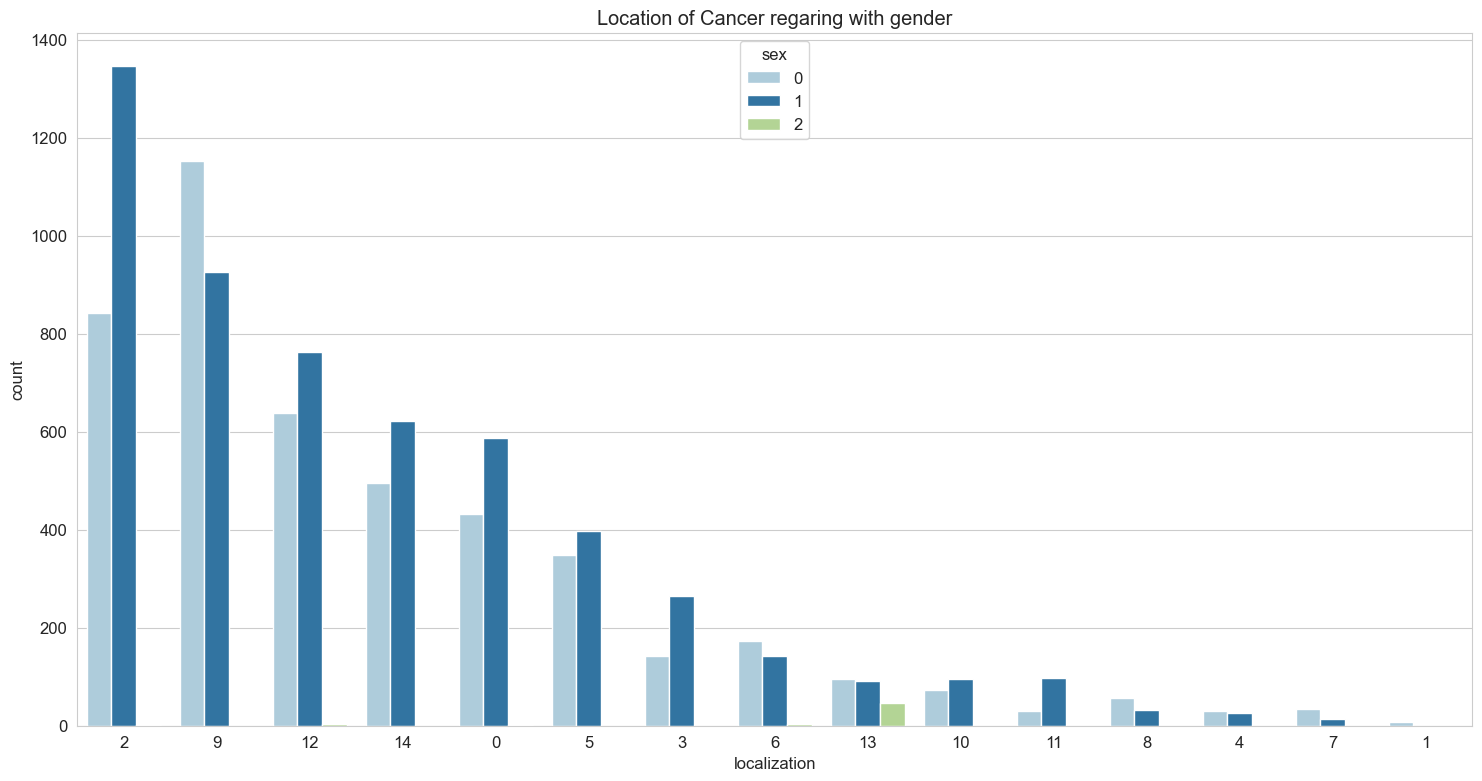

In [82]:
sns.set_style('whitegrid')

ax = sns.countplot(x='localization',hue='sex', data=HAM10, order = HAM10['localization'].value_counts().index, palette = 'Paired')

plt.title('Location of Cancer regaring with gender')
plt.show()

In [23]:
#hotenode sex : 
#'female'=0', "Male" =1 , other' =2

encoder = LabelEncoder()
HAM10['sex'] = encoder.fit_transform(HAM10['sex'])

HAM10

,lesion_id,image_id,dx,dx_type,age,sex,localization,img_path,image,dx_enc
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,1,11,../Project/All_imagesHAM\ISIC_0027419.jpg,"[[[0.7490196078431373, 0.596078431372549, 0.75...",2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,1,11,../Project/All_imagesHAM\ISIC_0025030.jpg,"[[[0.09411764705882353, 0.054901960784313725, ...",2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,1,11,../Project/All_imagesHAM\ISIC_0026769.jpg,"[[[0.7450980392156863, 0.5333333333333333, 0.5...",2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,1,11,../Project/All_imagesHAM\ISIC_0025661.jpg,"[[[0.13725490196078433, 0.07058823529411765, 0...",2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,1,4,../Project/All_imagesHAM\ISIC_0031633.jpg,"[[[0.6078431372549019, 0.43137254901960786, 0....",2
...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,1,0,../Project/All_imagesHAM\ISIC_0033084.jpg,"[[[0.7098039215686275, 0.6431372549019608, 0.7...",0
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,1,0,../Project/All_imagesHAM\ISIC_0033550.jpg,"[[[0.01568627450980392, 0.0196078431372549, 0....",0
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,1,0,../Project/All_imagesHAM\ISIC_0033536.jpg,"[[[0.5176470588235295, 0.4666666666666667, 0.4...",0
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,1,5,../Project/All_imagesHAM\ISIC_0032854.jpg,"[[[0.6274509803921569, 0.4823529411764706, 0.5...",0


In [24]:
encoder = LabelEncoder()
HAM10['dx_type'] = encoder.fit_transform(HAM10['dx_type'])

HAM10.head(20)

,lesion_id,image_id,dx,dx_type,age,sex,localization,img_path,image,dx_enc
0,HAM_0000118,ISIC_0027419,bkl,3,80.0,1,11,../Project/All_imagesHAM\ISIC_0027419.jpg,"[[[0.7490196078431373, 0.596078431372549, 0.75...",2
1,HAM_0000118,ISIC_0025030,bkl,3,80.0,1,11,../Project/All_imagesHAM\ISIC_0025030.jpg,"[[[0.09411764705882353, 0.054901960784313725, ...",2
2,HAM_0002730,ISIC_0026769,bkl,3,80.0,1,11,../Project/All_imagesHAM\ISIC_0026769.jpg,"[[[0.7450980392156863, 0.5333333333333333, 0.5...",2
3,HAM_0002730,ISIC_0025661,bkl,3,80.0,1,11,../Project/All_imagesHAM\ISIC_0025661.jpg,"[[[0.13725490196078433, 0.07058823529411765, 0...",2
4,HAM_0001466,ISIC_0031633,bkl,3,75.0,1,4,../Project/All_imagesHAM\ISIC_0031633.jpg,"[[[0.6078431372549019, 0.43137254901960786, 0....",2
5,HAM_0001466,ISIC_0027850,bkl,3,75.0,1,4,../Project/All_imagesHAM\ISIC_0027850.jpg,"[[[0.027450980392156862, 0.00392156862745098, ...",2
6,HAM_0002761,ISIC_0029176,bkl,3,60.0,1,5,../Project/All_imagesHAM\ISIC_0029176.jpg,"[[[0.7607843137254902, 0.5764705882352941, 0.5...",2
7,HAM_0002761,ISIC_0029068,bkl,3,60.0,1,5,../Project/All_imagesHAM\ISIC_0029068.jpg,"[[[0.6274509803921569, 0.4666666666666667, 0.4...",2
8,HAM_0005132,ISIC_0025837,bkl,3,70.0,0,2,../Project/All_imagesHAM\ISIC_0025837.jpg,"[[[0.47843137254901963, 0.3215686274509804, 0....",2
9,HAM_0005132,ISIC_0025209,bkl,3,70.0,0,2,../Project/All_imagesHAM\ISIC_0025209.jpg,"[[[0.8941176470588236, 0.7019607843137254, 0.7...",2


## Check outliers

<AxesSubplot:xlabel='age'>

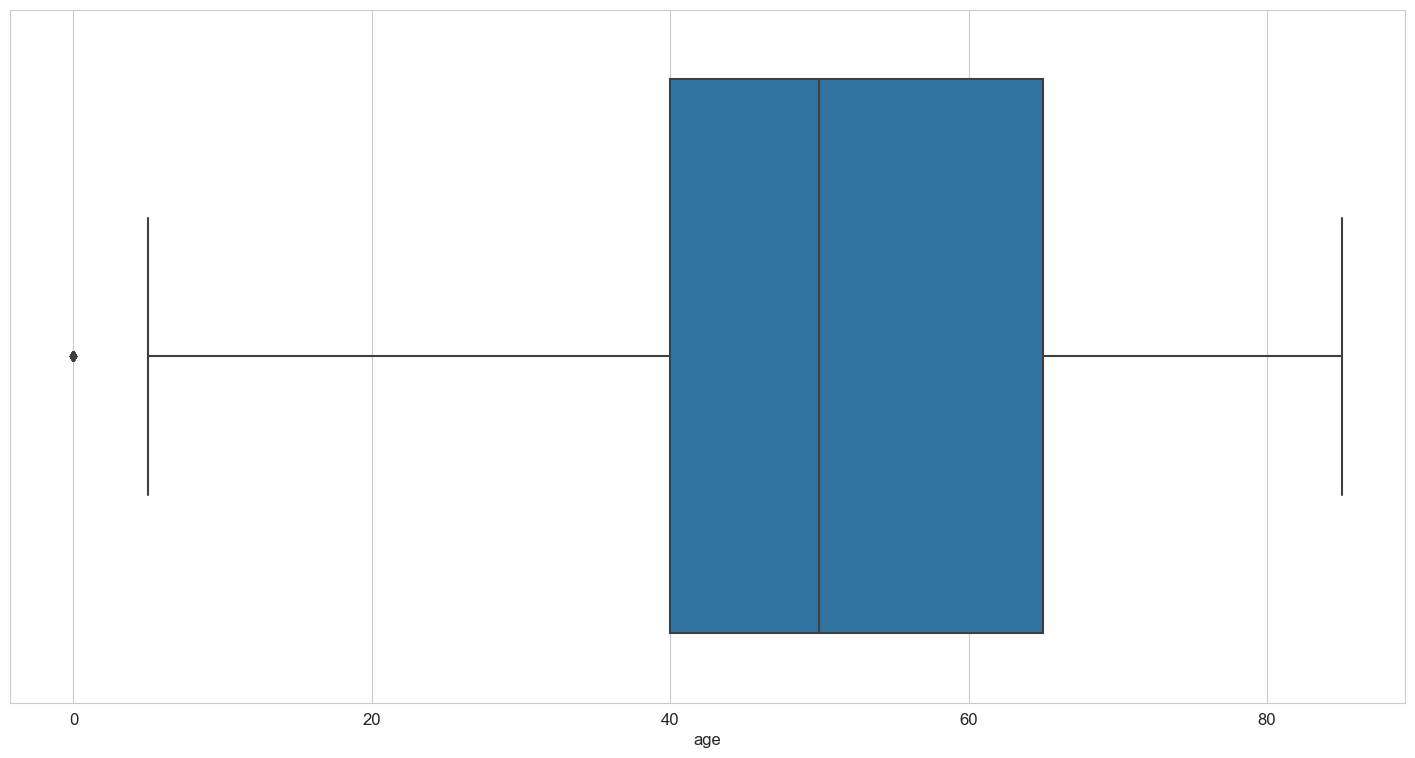

In [25]:
import seaborn as sns
sns.boxplot(x=HAM10['age'])

<AxesSubplot:xlabel='localization'>

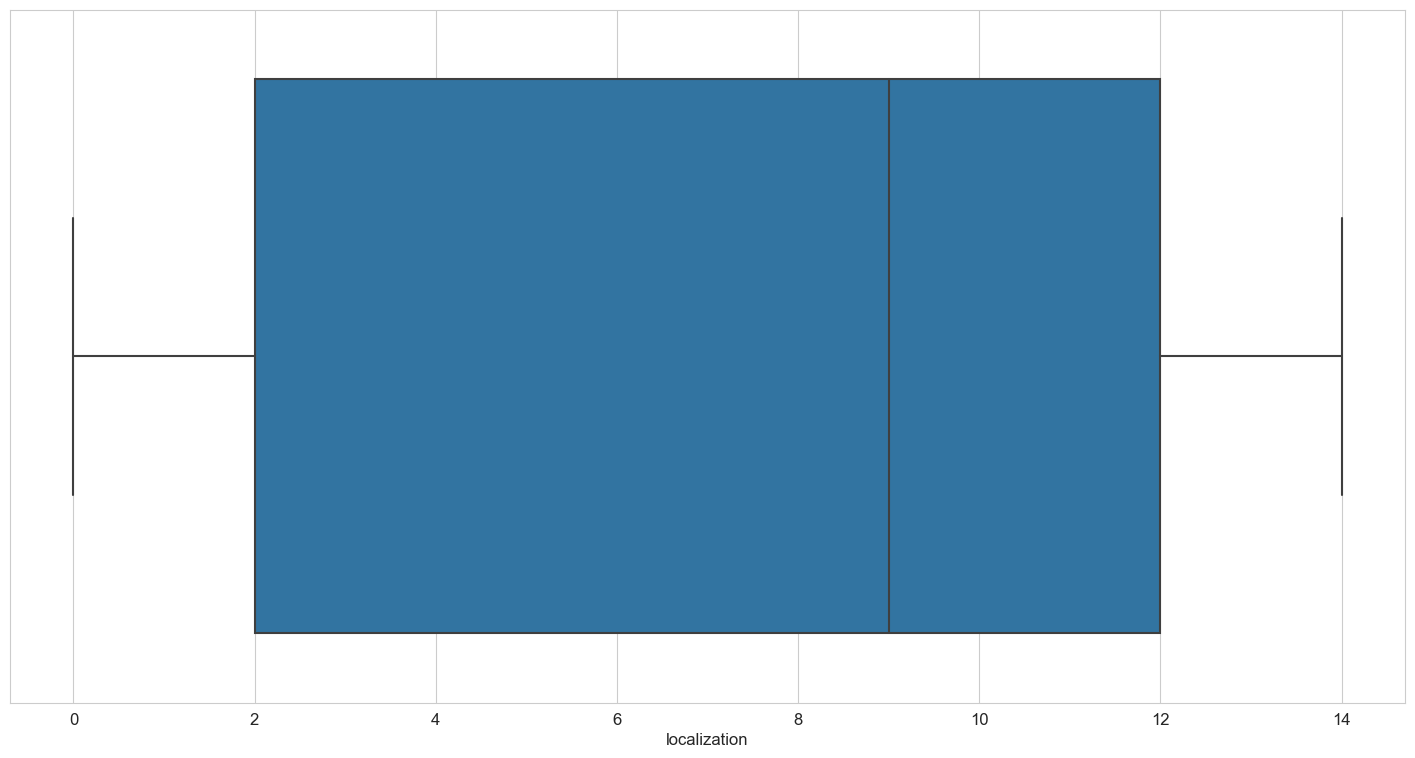

In [26]:
import seaborn as sns
sns.boxplot(x=HAM10['localization'])

<AxesSubplot:xlabel='dx_enc'>

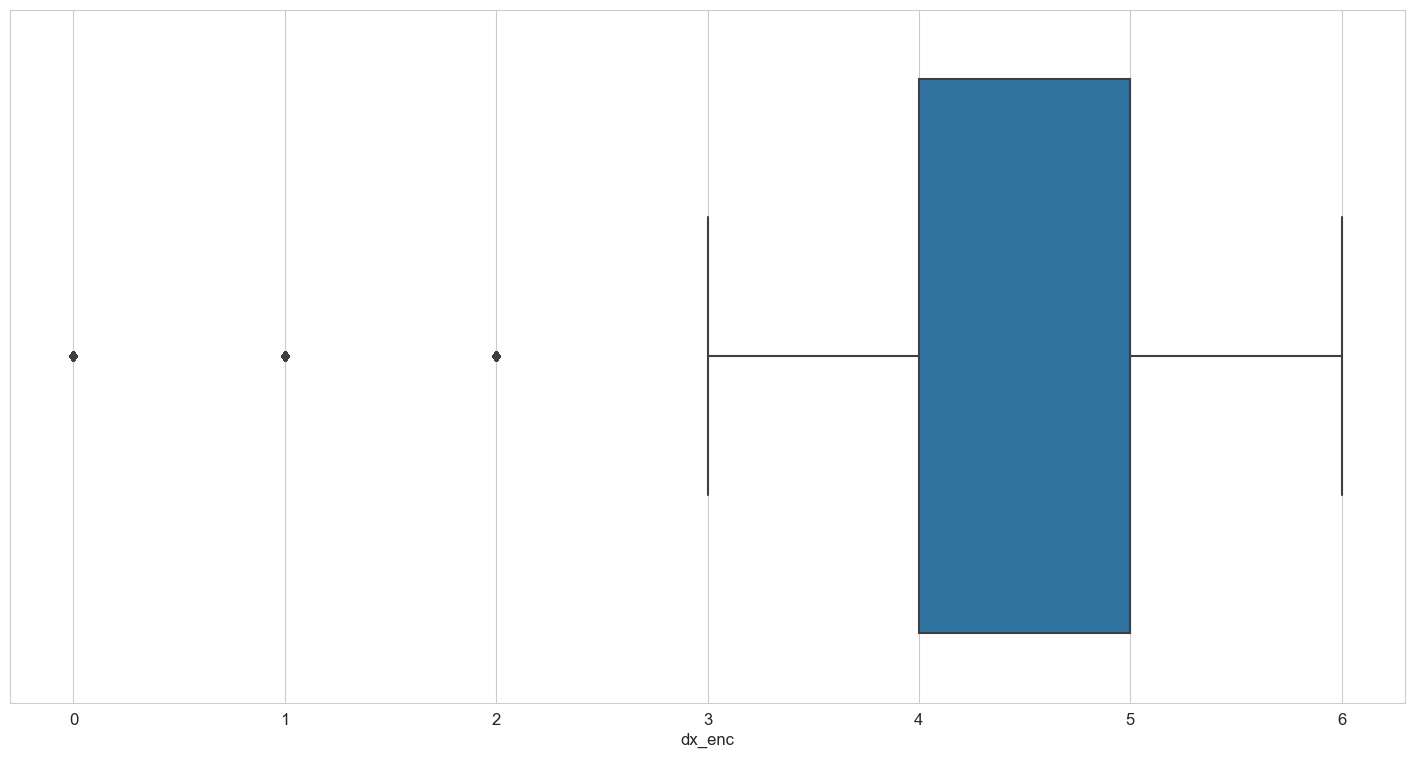

In [27]:
sns.boxplot(x=HAM10['dx_enc'])

## Note: 
The dataset does not have outliers or noisy dataset and clean

## plot images and resize them

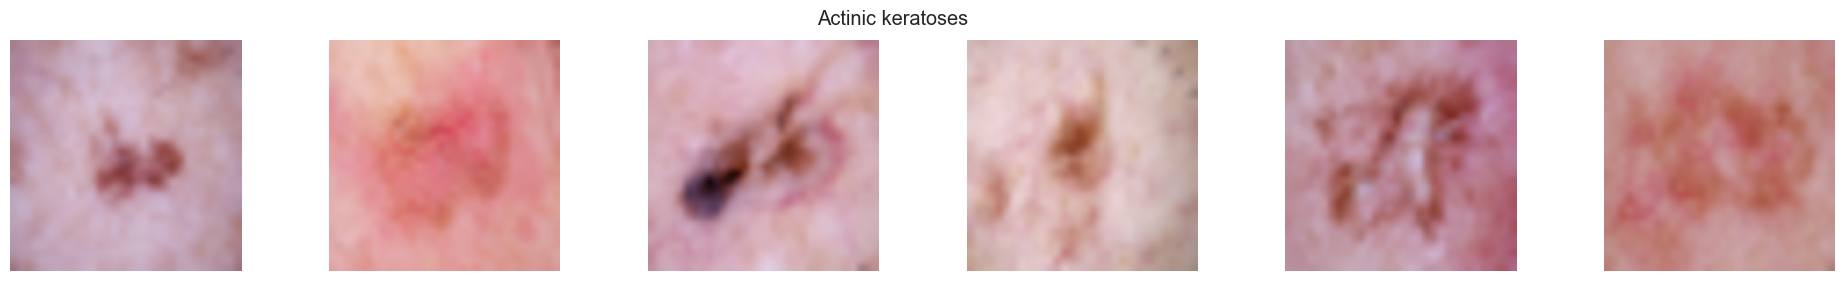

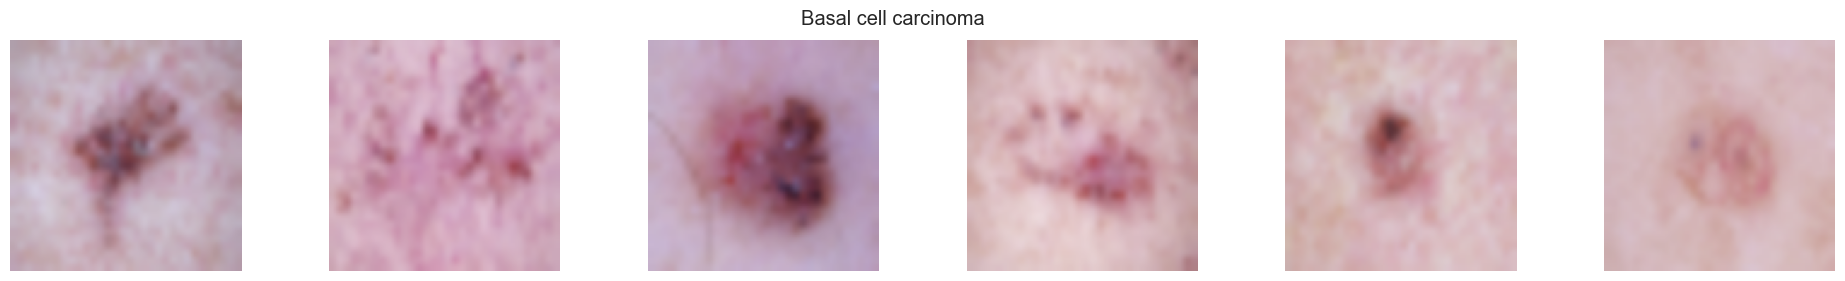

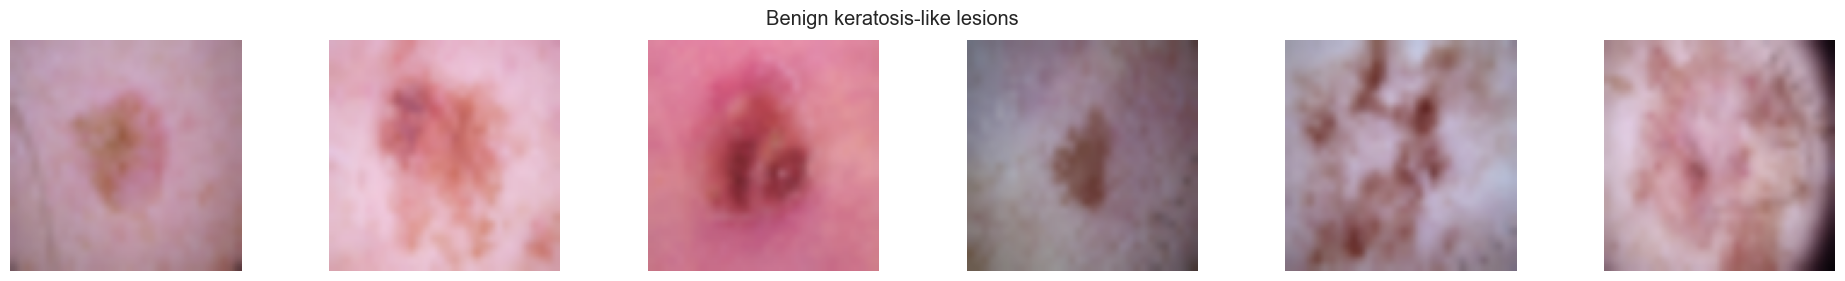

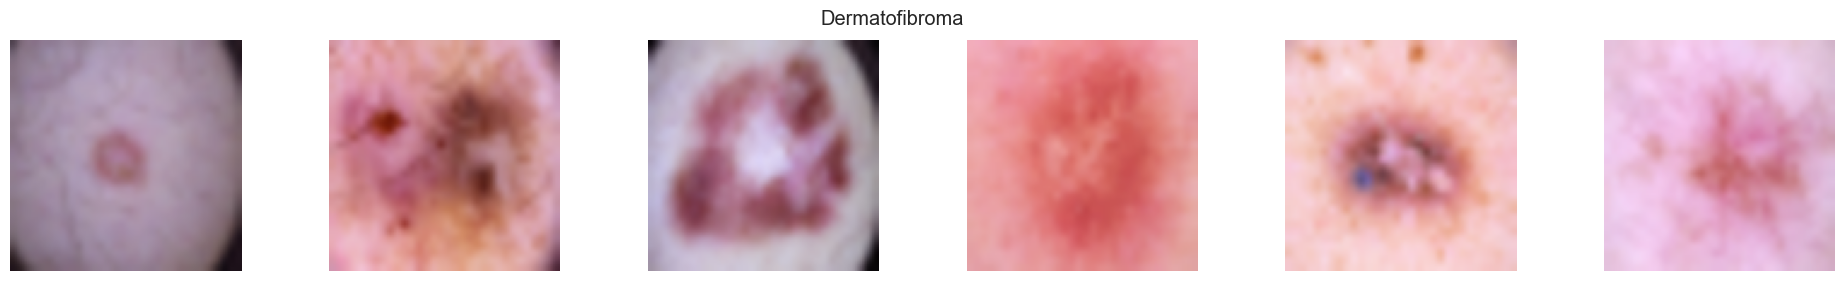

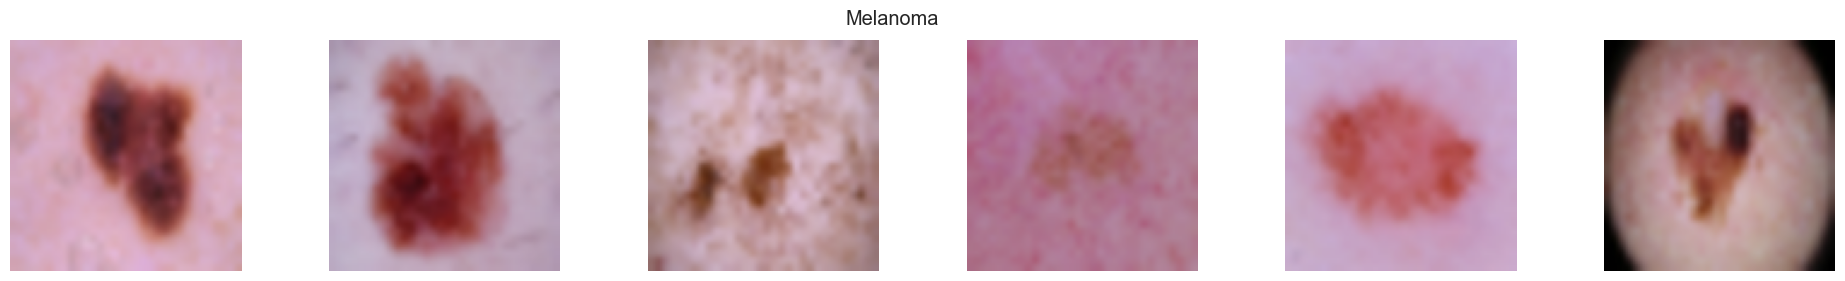

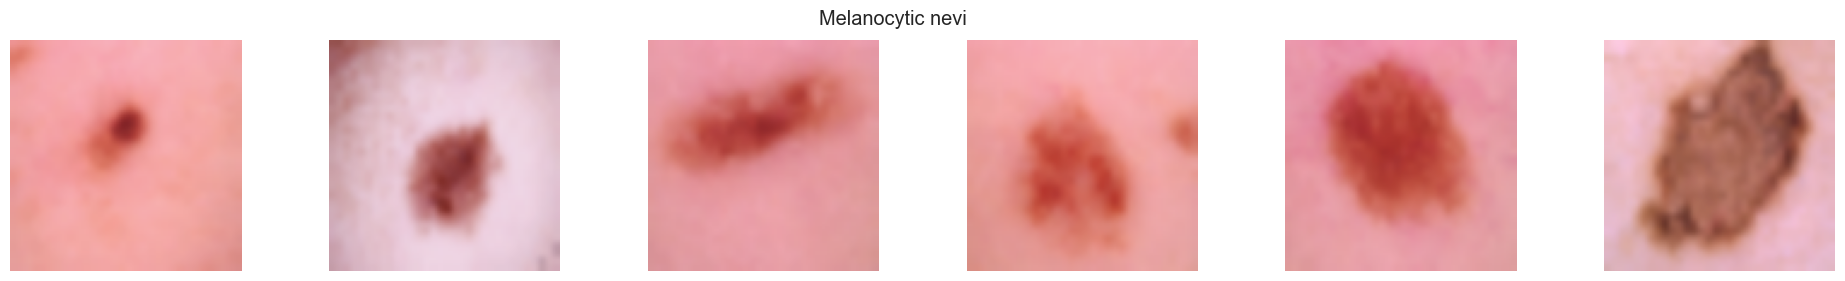

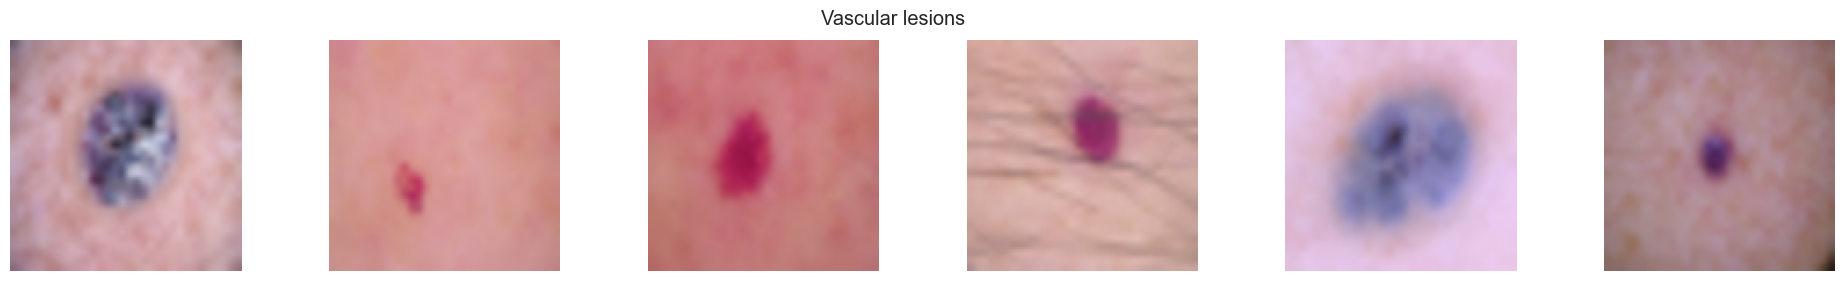

In [28]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Class names mapping
class_label_name = {
    0: 'Actinic keratoses',
    1: 'Basal cell carcinoma',
    2: 'Benign keratosis-like lesions',
    3: 'Dermatofibroma',
    4: 'Melanoma',
    5: 'Melanocytic nevi',
    6: 'Vascular lesions',
}

# Iterate over each class
for class_id, class_label_name in class_label_name.items():
    
    # find the row
    class_rows = HAM10[HAM10['dx_enc'] == class_id]

    # take 6 random images from the row
    rows = class_rows.sample(6, random_state=101)

    # figure with the size 24 to include images and add a title with the class name for each 6 images group
    fig, ax = plt.subplots(1, 6, figsize=(4 * 6, 3))
    fig.suptitle(class_label_name)

    for col, (_, c_row) in enumerate(rows.iterrows()):
        
        # Normalize the image and convert to uint8
        image_data = (c_row['image'] * 255).astype(np.uint8)

        # Create an image from the array and resize
        resized_image = Image.fromarray(image_data).resize((96, 96))

        # Show the image
        ax[col].imshow(resized_image)
        ax[col].axis('off')

    plt.show()


## Find correleation between features: 

Correlation:                dx_type       age       sex  localization    dx_enc
dx_type       1.000000  0.139496  0.025853     -0.105914 -0.238336
age           0.139496  1.000000  0.164660     -0.014862 -0.426660
sex           0.025853  0.164660  1.000000     -0.039845 -0.073130
localization -0.105914 -0.014862 -0.039845      1.000000  0.042260
dx_enc       -0.238336 -0.426660 -0.073130      0.042260  1.000000


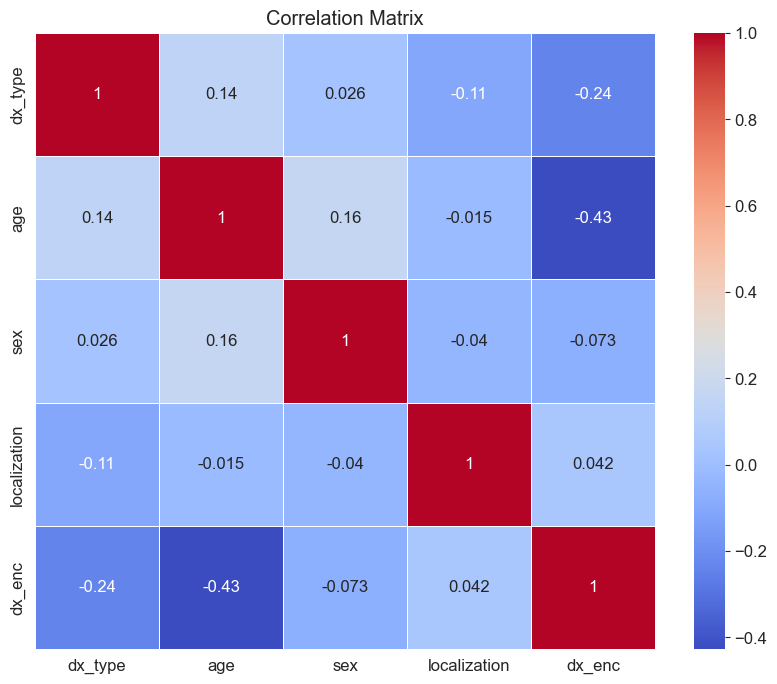

In [29]:
corr = HAM10.corr()
print("Correlation:", corr)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## CNN model 

In [31]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from imblearn.over_sampling import RandomOverSampler

In [32]:
HAM10['dx_enc'] = LabelEncoder().fit_transform(HAM10['dx'])

#create feature set and target 
X = np.stack(HAM10['image'].values)
y = HAM10['dx_enc'].values

In [33]:
# split data for training 80% and test set with size 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [34]:
# Add a oversampling step to balance the training data

oversample= RandomOverSampler(random_state=42)

# Flatten the images for resampling and return them to normal shape 
X_train_res, y_train_res = oversample.fit_resample(X_train.reshape(-1, 32 * 32 * 3), y_train) 
X_train_res = X_train_res.reshape(-1, 32, 32, 3) 

In [35]:
# build up the CNN model
CNN_model = Sequential()
CNN_model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3)))
CNN_model.add(Activation('relu'))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))

CNN_model.add(Conv2D(32, (3, 3)))
CNN_model.add(Activation('relu'))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))

CNN_model.add(Conv2D(64, (3, 3)))
CNN_model.add(Activation('relu'))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))

CNN_model.add(Flatten())
CNN_model.add(Dense(64))
CNN_model.add(Activation('relu'))
CNN_model.add(Dropout(0.5))
CNN_model.add(Dense(np.unique(y_train_res).shape[0])) 
CNN_model.add(Activation('softmax'))

In [36]:
# Compile CNN model
CNN_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with the balanced dataset
history = CNN_model.fit(X_train_res, y_train_res, batch_size=34, epochs=150, validation_split=0.2)

Epoch 1/150
885/885 [==============================] - 16s 15ms/step - loss: 1.5595 - accuracy: 0.3308 - val_loss: 4.5375 - val_accuracy: 0.1274
Epoch 2/150
885/885 [==============================] - 13s 14ms/step - loss: 1.3881 - accuracy: 0.4238 - val_loss: 5.1976 - val_accuracy: 0.1982
Epoch 3/150
885/885 [==============================] - 12s 14ms/step - loss: 1.2011 - accuracy: 0.5206 - val_loss: 4.2340 - val_accuracy: 0.1035
Epoch 4/150
885/885 [==============================] - 12s 14ms/step - loss: 0.9821 - accuracy: 0.6213 - val_loss: 3.9391 - val_accuracy: 0.1438
Epoch 5/150
885/885 [==============================] - 13s 14ms/step - loss: 0.8317 - accuracy: 0.6837 - val_loss: 3.2907 - val_accuracy: 0.1929
Epoch 6/150
885/885 [==============================] - 13s 14ms/step - loss: 0.7211 - accuracy: 0.7297 - val_loss: 2.8944 - val_accuracy: 0.1455
Epoch 7/150
885/885 [==============================] - 13s 14ms/step - loss: 0.6323 - accuracy: 0.7625 - val_loss: 2.7762 - val_ac

885/885 [==============================] - 13s 14ms/step - loss: 0.0795 - accuracy: 0.9746 - val_loss: 0.3375 - val_accuracy: 0.9099
Epoch 114/150
885/885 [==============================] - 13s 14ms/step - loss: 0.0839 - accuracy: 0.9735 - val_loss: 0.0683 - val_accuracy: 0.9803
Epoch 115/150
885/885 [==============================] - 13s 14ms/step - loss: 0.0728 - accuracy: 0.9763 - val_loss: 0.3262 - val_accuracy: 0.9166
Epoch 116/150
885/885 [==============================] - 13s 14ms/step - loss: 0.0864 - accuracy: 0.9723 - val_loss: 0.1393 - val_accuracy: 0.9522
Epoch 117/150
885/885 [==============================] - 13s 15ms/step - loss: 0.0780 - accuracy: 0.9754 - val_loss: 0.1767 - val_accuracy: 0.9463
Epoch 118/150
885/885 [==============================] - 17s 19ms/step - loss: 0.0653 - accuracy: 0.9789 - val_loss: 0.3049 - val_accuracy: 0.8992
Epoch 119/150
885/885 [==============================] - 12s 14ms/step - loss: 0.1001 - accuracy: 0.9678 - val_loss: 0.2136 - val_ac

In [81]:
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 activation (Activation)     (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 13, 13, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                    

In [38]:
X_test_shaped = X_test.reshape(-1, 32, 32, 3)
test_loss, test_acc = CNN_model.evaluate(X_test_shaped, y_test)
print("Test Loss:", test_loss)
print(f"Model Accuracy : {test_acc*100:.2f}%")

63/63 [==============================] - 0s 5ms/step - loss: 4.4067 - accuracy: 0.7069
Test Loss: 4.406668186187744
Model Accuracy : 70.69%


#### Evaluate the model

In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
#predict y from the CNN model
y_pred_probs = CNN_model.predict(X_test_shaped)
y_pred = np.argmax(y_pred_probs, axis=1)
# convert y from one hot encode to class label 
actual_y = y_test

63/63 [==============================] - 1s 9ms/step


Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.36      0.32        53
           1       0.45      0.43      0.44       109
           2       0.38      0.46      0.41       218
           3       0.40      0.20      0.27        20
           4       0.43      0.39      0.41       242
           5       0.86      0.85      0.85      1336
           6       1.00      0.60      0.75        25

    accuracy                           0.71      2003
   macro avg       0.54      0.47      0.49      2003
weighted avg       0.71      0.71      0.71      2003



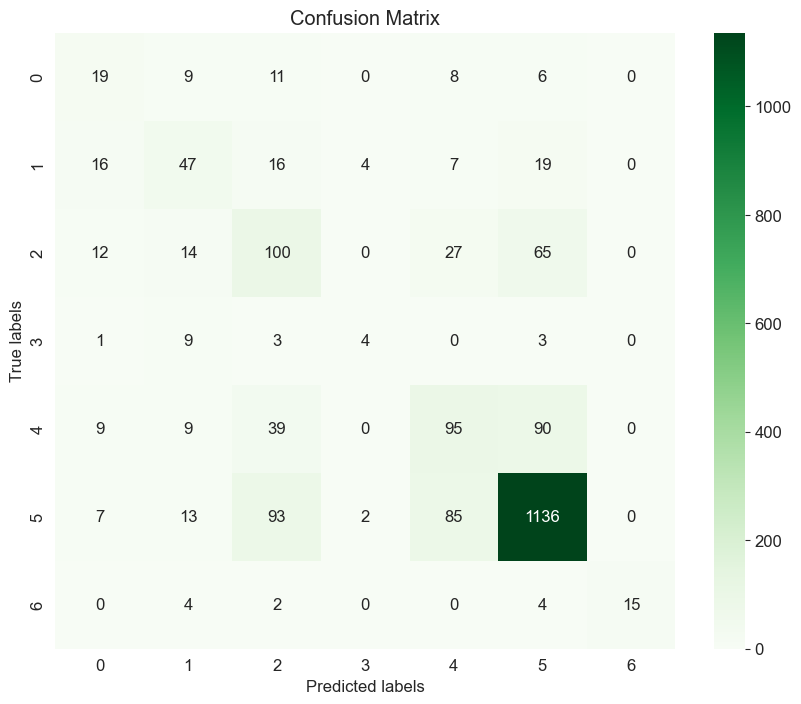

In [51]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

#Classification report 
print("Classification Report:\n", classification_report(actual_y, y_pred))

# Create a confusion matrix
confusion_matrix = confusion_matrix(actual_y, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Greens')

plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.show()

In [52]:
print(y_test.shape)

(2003,)


#### Plot training and validation accuracy 

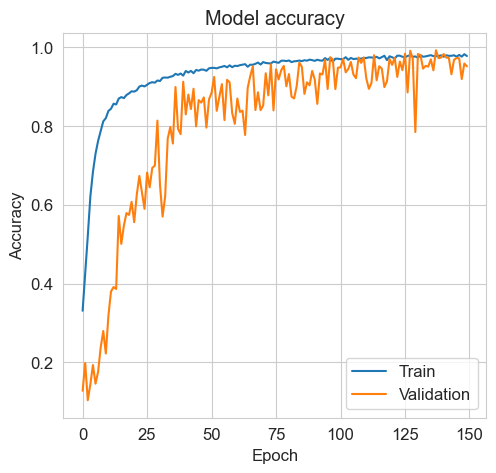

In [53]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

#### Plot training and validation loss 

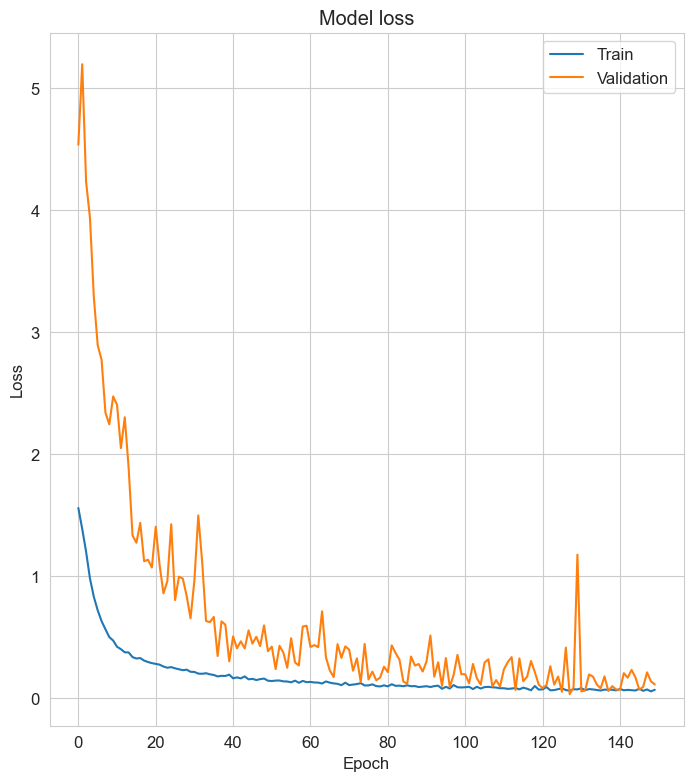

In [54]:
plt.subplot(1, 2, 2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

 ## Multi-input CNN

In [55]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, concatenate
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [56]:
#create a numpay array of the images 
images = np.stack(HAM10['image'].values)

#extrat categorical featuresthat we will be testing with images 
categorical_feat = HAM10[['dx_type','age', 'sex', 'localization']]

#Encode and scale categorical features 
hotencode_feat = ColumnTransformer([('scaler', StandardScaler(), ['age']),('encoder', OneHotEncoder(), ['dx_type','sex', 'localization'])])

X_struc = hotencode_feat.fit_transform(categorical_feat)

In [57]:
# Encode target feature (skin cancer labels)
encoder = LabelEncoder()

target_feat = encoder.fit_transform(HAM10['dx_enc'])
target_feat = to_categorical(target_feat)
#num_classes = target_feat.shape[1]

In [58]:
# Split the image data
X_train_img, X_test_img, y_train, y_test = train_test_split(images, target_feat, test_size=0.2, random_state=101)
# Split the structured data
X_train_struc, X_test_struc = train_test_split(X_struc, test_size=0.2, random_state=101)

In [59]:
# Create a model with two inputs
# one for image
input_shape = X_train_img[0].shape
# second for structured data
str_input_shape = X_train_struc.shape[1]  

# Define model inputs
img_input = Input(shape=input_shape)
struc_input = Input(shape=(str_input_shape,))

In [60]:
# Image branch

img_input = Input(shape=input_shape)

x = Conv2D(32, (3, 3), padding='same', activation='relu')(img_input)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)

image_branch = Model(inputs=img_input, outputs=x)

In [61]:
# Structured data branch 
y = Dense(32, activation='relu')(struc_input)  
y = Dropout(0.25)(y)
#more layer
y = Dense(16, activation='relu')(y)  

structured_branch = Model(inputs=struc_input, outputs=y)

In [62]:
# Combine bott bracnches output
combine_branches = concatenate([image_branch.output, structured_branch.output])

In [64]:
# model layers
z = Dense(128, activation="relu")(combine_branches)
z = Dropout(0.5)(z)
z = Dense(7, activation="softmax")(z)

In [65]:
# The full model with both branches 
multi_input_CNN_model = Model(inputs=[image_branch.input, structured_branch.input], outputs=z)

In [67]:
#Compile and fit the model 

multi_input_CNN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history2 = multi_input_CNN_model.fit([X_train_img, X_train_struc], y_train, epochs=150, batch_size=32, validation_data=([X_test_img, X_test_struc], y_test))

Epoch 1/150
251/251 [==============================] - 12s 37ms/step - loss: 1.1254 - accuracy: 0.6477 - val_loss: 4.5261 - val_accuracy: 0.1638
Epoch 2/150
251/251 [==============================] - 8s 32ms/step - loss: 0.8476 - accuracy: 0.6827 - val_loss: 0.8309 - val_accuracy: 0.6840
Epoch 3/150
251/251 [==============================] - 8s 32ms/step - loss: 0.7943 - accuracy: 0.6983 - val_loss: 0.7949 - val_accuracy: 0.7224
Epoch 4/150
251/251 [==============================] - 8s 33ms/step - loss: 0.7822 - accuracy: 0.7054 - val_loss: 0.7349 - val_accuracy: 0.7189
Epoch 5/150
251/251 [==============================] - 9s 34ms/step - loss: 0.7494 - accuracy: 0.7184 - val_loss: 0.7901 - val_accuracy: 0.6855
Epoch 6/150
251/251 [==============================] - 8s 32ms/step - loss: 0.7438 - accuracy: 0.7161 - val_loss: 0.7482 - val_accuracy: 0.7304
Epoch 7/150
251/251 [==============================] - 8s 34ms/step - loss: 0.7343 - accuracy: 0.7187 - val_loss: 0.6621 - val_accuracy

251/251 [==============================] - 8s 32ms/step - loss: 0.2138 - accuracy: 0.9123 - val_loss: 0.7665 - val_accuracy: 0.8128
Epoch 114/150
251/251 [==============================] - 8s 32ms/step - loss: 0.2167 - accuracy: 0.9176 - val_loss: 0.7049 - val_accuracy: 0.8098
Epoch 115/150
251/251 [==============================] - 8s 31ms/step - loss: 0.2268 - accuracy: 0.9134 - val_loss: 0.7887 - val_accuracy: 0.8128
Epoch 116/150
251/251 [==============================] - 8s 31ms/step - loss: 0.2156 - accuracy: 0.9165 - val_loss: 0.6848 - val_accuracy: 0.7933
Epoch 117/150
251/251 [==============================] - 8s 31ms/step - loss: 0.2056 - accuracy: 0.9182 - val_loss: 0.7295 - val_accuracy: 0.8108
Epoch 118/150
251/251 [==============================] - 8s 31ms/step - loss: 0.2103 - accuracy: 0.9176 - val_loss: 0.8501 - val_accuracy: 0.8098
Epoch 119/150
251/251 [==============================] - 8s 31ms/step - loss: 0.2182 - accuracy: 0.9124 - val_loss: 0.7095 - val_accuracy:

#### Evaluate the model

In [69]:
results = multi_input_CNN_model.evaluate([X_test_img, X_test_struc], y_test)

# results will be a list where the first element is the loss and the second element is the accuracy
test_loss, test_acc = results

print("Total Test Loss:", test_loss)
print("Total Test Accuracy:", test_acc)

63/63 [==============================] - 1s 9ms/step - loss: 0.8708 - accuracy: 0.8073
Total Test Loss: 0.8708409667015076
Total Test Accuracy: 0.8072890639305115


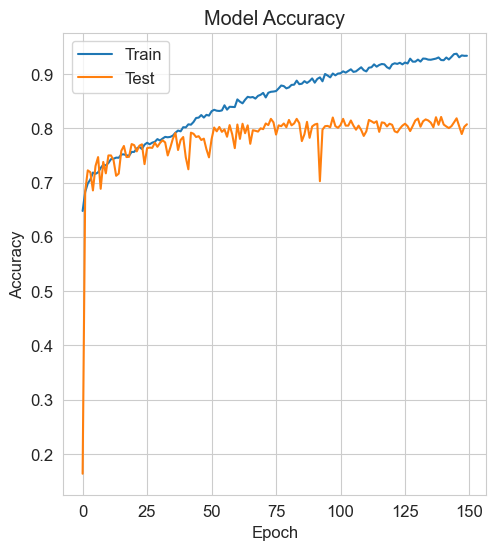

In [71]:
#Accuracy visualization 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


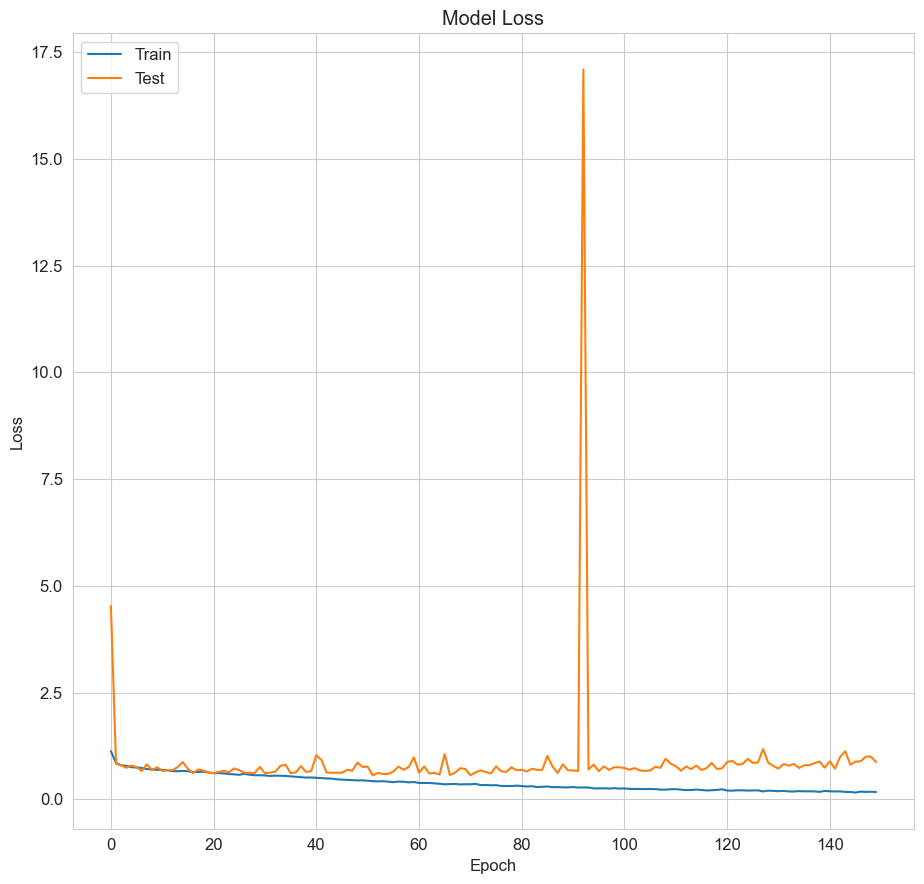

In [72]:
# loss
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


In [74]:
# predect y from test set
y_pred_probs = multi_input_CNN_model.predict([X_test_img, X_test_struc])
y_pred = np.argmax(y_pred_probs, axis=1)
actual_y= np.argmax(y_test, axis=1)  

63/63 [==============================] - 1s 8ms/step


              precision    recall  f1-score   support

     Class 0       0.49      0.32      0.39        53
     Class 1       0.68      0.50      0.58       109
     Class 2       0.55      0.62      0.58       218
     Class 3       0.92      0.60      0.73        20
     Class 4       0.62      0.50      0.56       242
     Class 5       0.89      0.95      0.92      1336
     Class 6       0.88      0.56      0.68        25

    accuracy                           0.81      2003
   macro avg       0.72      0.58      0.63      2003
weighted avg       0.80      0.81      0.80      2003



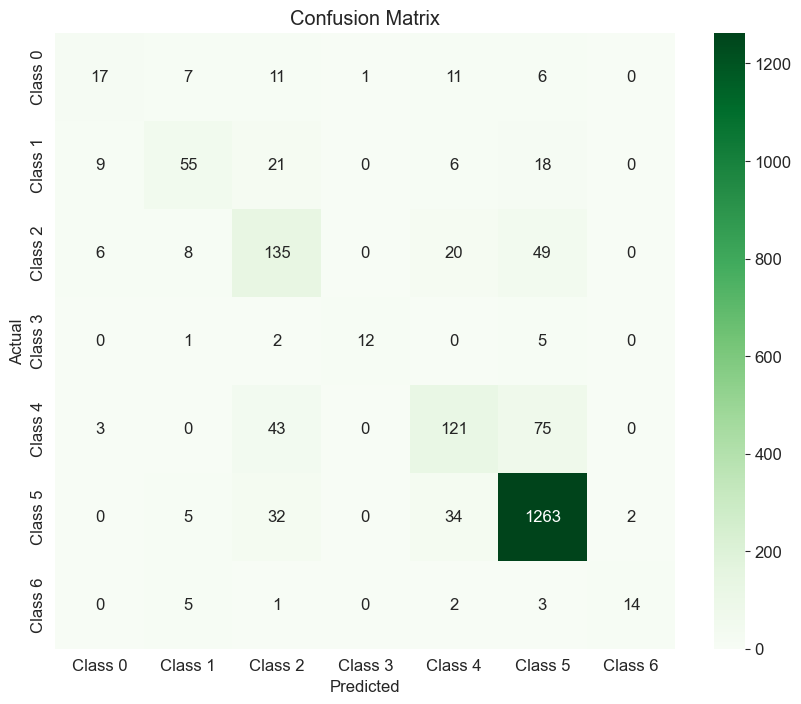

In [80]:
# Generate the classification report
print(classification_report(actual_y, y_pred, target_names=[f"Class {i}" for i in range(7)]))

# Generate the confusion matrix
conf_mtx = confusion_matrix(actual_y, y_pred)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_mtx, annot=True, fmt='d', cmap='Greens', xticklabels=[f"Class {i}" for i in range(7)], yticklabels=[f"Class {i}" for i in range(7)])

plt.title('Confusion Matrix')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


## Skin Care Detection Model(CNN)

## Libraries

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import shuffle
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.utils import to_categorical
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from datetime import datetime
from tensorflow.keras.applications import ResNet50, ResNet101
from tensorflow import keras
from tensorflow.keras.callbacks import LearningRateScheduler

2023-12-06 00:36:34.060089: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load Dataset

In [2]:
data_dir = 'HAM10000/'

# Extract image paths from both image folders
image_folder_1 = os.path.join(data_dir, 'HAM10000_images_part_1')
image_folder_2 = os.path.join(data_dir, 'HAM10000_images_part_2')

# image files from both directories
image_files = []
image_files.extend([os.path.join(image_folder_1, filename) for filename in os.listdir(image_folder_1)])
image_files.extend([os.path.join(image_folder_2, filename) for filename in os.listdir(image_folder_2)])


## Data Splitting

In [3]:
train_ratio = 0.7
test_ratio = 0.15
val_ratio = 0.15

# Split the data into train, test, and validation sets
train_images, test_val_images = train_test_split(image_files, test_size=test_ratio + val_ratio, random_state=42)
test_images, val_images = train_test_split(test_val_images, test_size=val_ratio / (test_ratio + val_ratio), random_state=42)

# Step 3: Split the metadata into corresponding sets
metadata_path = os.path.join(data_dir, "HAM10000_metadata.csv")
metadata = pd.read_csv(metadata_path)

train_images_no_extension = [os.path.splitext(os.path.basename(image))[0] for image in train_images]
test_images_no_extension = [os.path.splitext(os.path.basename(image))[0] for image in test_images]
val_images_no_extension = [os.path.splitext(os.path.basename(image))[0] for image in val_images]

test_metadata = metadata[metadata['image_id'].isin(test_images_no_extension)]
val_metadata = metadata[metadata['image_id'].isin(val_images_no_extension)]
train_metadata = metadata[metadata['image_id'].isin(train_images_no_extension)]
print(train_metadata)

         lesion_id      image_id     dx dx_type   age     sex     localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male            scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male            scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male            scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male              ear
7      HAM_0002761  ISIC_0029068    bkl   histo  60.0    male             face
...            ...           ...    ...     ...   ...     ...              ...
10009  HAM_0005705  ISIC_0031430  akiec   histo  75.0  female  lower extremity
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male          abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male          abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male          abdomen
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female             back

[7010 rows x 7 columns]


### Preprocessing

In [4]:
# Resize and normalize images
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))
    img = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    return img

# Preprocess all sets of images
train_images = [preprocess_image(image) for image in train_images]
test_images = [preprocess_image(image) for image in test_images]
val_images = [preprocess_image(image) for image in val_images]


label_binarizer = LabelBinarizer()
train_labels = label_binarizer.fit_transform(train_metadata['dx'])
test_labels = label_binarizer.transform(test_metadata['dx'])
val_labels = label_binarizer.transform(val_metadata['dx'])

## CNN model

In [5]:
# Load the ResNet-50 model instead of ResNet-101
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Custom top for the ResNet model
top_model = base_model.output
top_model = GlobalAveragePooling2D()(top_model)
top_model = Dense(128, activation='relu')(top_model)
predictions = Dense(7, activation='softmax')(top_model)

# Combine the ResNet base and the custom top
model = Model(inputs=base_model.input, outputs=predictions)

### Optimizer and fitting the model

In [ ]:
# Freeze more base model layers
for layer in base_model.layers[:-10]:  # Freeze layers except for the last 10
    layer.trainable = False

# Adjusted learning rate schedule function
def lr_schedule(epoch):
    lr = 0.001
    if epoch > 10:
        lr *= 0.1
    if epoch > 20:
        lr *= 0.1
    return lr

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(train_images)

# Train the model
start_time = datetime.now()

history = model.fit(
    datagen.flow(np.array(train_images), train_labels, batch_size=64),  # Decreased batch size
    epochs=30, 
    validation_data=(np.array(val_images), val_labels),
    callbacks=[LearningRateScheduler(lr_schedule)]
)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Epoch 1/30
110/110 [==============================] - 663s 6s/step - loss: 1.1557 - accuracy: 0.6646 - val_loss: 1.1619 - val_accuracy: 0.6680 - lr: 0.0010
Epoch 2/30
110/110 [==============================] - 667s 6s/step - loss: 1.1434 - accuracy: 0.6700 - val_loss: 1.1556 - val_accuracy: 0.6680 - lr: 0.0010
Epoch 3/30
110/110 [==============================] - 617s 6s/step - loss: 1.1414 - accuracy: 0.6700 - val_loss: 1.1743 - val_accuracy: 0.6680 - lr: 0.0010
Epoch 4/30
110/110 [==============================] - 634s 6s/step - loss: 1.1383 - accuracy: 0.6700 - val_loss: 1.1506 - val_accuracy: 0.6680 - lr: 0.0010
Epoch 5/30
110/110 [==============================] - 647s 6s/step - loss: 1.1355 - accuracy: 0.6700 - val_loss: 1.1687 - val_accuracy: 0.6680 - lr: 0.0010
Epoch 6/30
110/110 [==============================] - 684s 6s/step - loss: 1.1343 - accuracy: 0.6700 - val_loss: 1.1521 - val_accuracy: 0.6680 - lr: 0.0010
Epoch 7/30
110/110 [==============================] - 610s 6s/st

## Evaluation

In [ ]:
#plot of accuracy vs epoch\
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#plot of loss vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# save it to a file
model.save("skin_cancer_detection_model.keras")

In [ ]:
test_loss, test_accuracy = model.evaluate(np.array(test_images), test_labels)

In [ ]:
gpu_info = !nvidia-smi
gpu_info
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
!cd kaggle
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

/bin/bash: line 1: cd: kaggle: No such file or directory
skin-cancer-mnist-ham10000.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -q skin-cancer-mnist-ham10000.zip -d dataset

replace dataset/HAM10000_images_part_1/ISIC_0024306.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
import sklearn
import tensorflow
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import requests

In [ ]:
metadata = pd.read_csv('/content/dataset/HAM10000_metadata.csv')
labels = metadata['dx'].astype('category').cat.codes.values
labels = to_categorical(labels)

img_width, img_height = 224, 224

def load_image_from_dirs(img_path, directories, target_size=(img_width, img_height)):
    for directory in directories:
        try:
            img = image.load_img(f'{directory}/{img_path}.jpg', target_size=target_size)
            return image.img_to_array(img)
        except FileNotFoundError:
            continue
    raise FileNotFoundError(f"Image {img_path}.jpg not found in any of the provided directories.")

directories = ['/content/dataset/HAM10000_images_part_1', '/content/dataset/HAM10000_images_part_2']

images = []
for img_path in metadata['image_id']:
    img_array = load_image_from_dirs(img_path, directories)
    images.append(img_array)

images = np.array(images)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.layers import Dropout, Dense, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.applications import ResNet101
from keras.models import Sequential
import math
from tensorflow.keras.metrics import Recall, Precision

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=(0.8, 1.2),
    fill_mode='nearest'
)

# Learning Rate Schedule
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

lrate = LearningRateScheduler(step_decay)

# Model Architecture
img_width, img_height = 224, 224
num_classes = 7  # Update this if your number of classes is different

base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Fine-tuning more layers
for layer in base_model.layers[:-20]:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(2048, activation='relu'),
    Dropout(0.7),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=[Recall(), Precision(), 'accuracy'])

# Fit model using generator
batch_size = 64

model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
          steps_per_epoch=len(X_train) // batch_size,
          epochs=20,
          validation_data=(X_test, y_test),
          callbacks=[lrate])


171446536/171446536 [==============================] - 1s 0us/step
Epoch 1/20
125/125 [==============================] - 108s 783ms/step - loss: 0.9708 - recall_4: 0.6013 - precision_4: 0.8025 - accuracy: 0.6889 - val_loss: 2.4573 - val_recall_4: 0.6430 - val_precision_4: 0.7289 - val_accuracy: 0.6895 - lr: 0.0010
Epoch 2/20
125/125 [==============================] - 98s 781ms/step - loss: 0.6989 - recall_4: 0.6782 - precision_4: 0.8354 - accuracy: 0.7535 - val_loss: 0.9134 - val_recall_4: 0.6276 - val_precision_4: 0.7716 - val_accuracy: 0.7064 - lr: 0.0010
Epoch 3/20
125/125 [==============================] - 98s 784ms/step - loss: 0.6253 - recall_4: 0.7168 - precision_4: 0.8465 - accuracy: 0.7767 - val_loss: 1.4249 - val_recall_4: 0.5552 - val_precision_4: 0.6077 - val_accuracy: 0.5886 - lr: 0.0010
Epoch 4/20
125/125 [==============================] - 99s 791ms/step - loss: 0.5847 - recall_4: 0.7251 - precision_4: 0.8475 - accuracy: 0.7862 - val_loss: 0.7181 - val_recall_4: 0.7224 - 

Epoch 1/10
250/250 [==============================] - 90s 331ms/step - loss: 0.8517 - accuracy: 0.7103 - val_loss: 1.1643 - val_accuracy: 0.5911 - lr: 0.0010
Epoch 2/10
250/250 [==============================] - 81s 322ms/step - loss: 0.6646 - accuracy: 0.7636 - val_loss: 0.6691 - val_accuracy: 0.7664 - lr: 0.0010
Epoch 3/10
250/250 [==============================] - 81s 325ms/step - loss: 0.6091 - accuracy: 0.7786 - val_loss: 0.7811 - val_accuracy: 0.7094 - lr: 0.0010
Epoch 4/10
250/250 [==============================] - 81s 323ms/step - loss: 0.5622 - accuracy: 0.7983 - val_loss: 0.6306 - val_accuracy: 0.7738 - lr: 0.0010
Epoch 5/10
250/250 [==============================] - 80s 319ms/step - loss: 0.4678 - accuracy: 0.8303 - val_loss: 0.5903 - val_accuracy: 0.7978 - lr: 5.0000e-04
Epoch 6/10
250/250 [==============================] - 81s 324ms/step - loss: 0.4294 - accuracy: 0.8436 - val_loss: 0.5891 - val_accuracy: 0.8128 - lr: 5.0000e-04
Epoch 7/10
250/250 [==============================] - 81s 322ms/step - loss: 0.3983 - accuracy: 0.8501 - val_loss: 0.6346 - val_accuracy: 0.7798 - lr: 5.0000e-04
Epoch 8/10
250/250 [==============================] - 80s 321ms/step - loss: 0.3853 - accuracy: 0.8600 - val_loss: 0.5623 - val_accuracy: 0.8128 - lr: 5.0000e-04
Epoch 9/10
250/250 [==============================] - 81s 322ms/step - loss: 0.3751 - accuracy: 0.8631 - val_loss: 0.5791 - val_accuracy: 0.8048 - lr: 5.0000e-04
Epoch 10/10
250/250 [==============================] - 81s 324ms/step - loss: 0.3198 - accuracy: 0.8847 - val_loss: 0.6248 - val_accuracy: 0.7873 - lr: 2.5000e-04

In [ ]:
model_name = "google/vit-base-patch16-224"
model = ViTForImageClassification.from_pretrained(model_name)
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

In [ ]:
import torch
import torch.nn as nn
model.classifier = nn.Linear(model.config.hidden_size, 7)

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from tqdm import tqdm
def train_model(model, criterion, optimizer, train_loader, val_loader, epochs=5):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Train
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}", unit='batch'):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs.logits, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.logits, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = correct / total
        print(f'Train Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs.logits, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.logits, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_loss = val_loss / len(val_loader)
        val_acc = correct / total
        print(f'Validation Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}')

    return model

In [ ]:
def test_model(model, test_loader):
  with tf.device('/device:GPU:0'):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.logits, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    acc = correct / total
    print(f'Test Accuracy: {acc:.4f}')

    return acc

In [ ]:
X_train = np.transpose(X_train, (0, 3, 1, 2))
X_val = np.transpose(X_val, (0, 3, 1, 2))
X_test = np.transpose(X_test, (0, 3, 1, 2))

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
y_train_indices = torch.argmax(torch.tensor(y_train), dim=1)
y_val_indices = torch.argmax(torch.tensor(y_val), dim=1)
y_test_indices = torch.argmax(torch.tensor(y_test), dim=1)

train_data = TensorDataset(torch.tensor(X_train).float(), y_train_indices)
val_data = TensorDataset(torch.tensor(X_val).float(), y_val_indices)
test_data = TensorDataset(torch.tensor(X_test).float(), y_test_indices)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32)
test_loader = DataLoader(test_data, batch_size=32)

In [ ]:
import torch.nn as nn

criterion = nn.CrossEntropyLoss()
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=0.001)

trained_model = train_model(model, criterion, optimizer, train_loader, val_loader, 20)

Epoch 1/20: 100%|██████████| 188/188 [01:06<00:00,  2.81batch/s]


Train Loss: 1.0798, Accuracy: 0.6648
Validation Loss: 1.0386, Accuracy: 0.6186


Epoch 2/20: 100%|██████████| 188/188 [01:00<00:00,  3.13batch/s]


Train Loss: 0.9398, Accuracy: 0.6692
Validation Loss: 1.0387, Accuracy: 0.6465


Epoch 3/20: 100%|██████████| 188/188 [01:00<00:00,  3.12batch/s]


Train Loss: 0.9184, Accuracy: 0.6773
Validation Loss: 0.9119, Accuracy: 0.6430


Epoch 4/20: 100%|██████████| 188/188 [01:00<00:00,  3.12batch/s]


Train Loss: 0.8702, Accuracy: 0.6830
Validation Loss: 0.8815, Accuracy: 0.6665


Epoch 5/20: 100%|██████████| 188/188 [01:00<00:00,  3.12batch/s]


Train Loss: 0.8612, Accuracy: 0.6835
Validation Loss: 0.8884, Accuracy: 0.6610


Epoch 6/20: 100%|██████████| 188/188 [01:00<00:00,  3.12batch/s]


Train Loss: 0.8154, Accuracy: 0.6923
Validation Loss: 0.9048, Accuracy: 0.6660


Epoch 7/20: 100%|██████████| 188/188 [01:00<00:00,  3.12batch/s]


Train Loss: 0.8010, Accuracy: 0.6980
Validation Loss: 0.7803, Accuracy: 0.7029


Epoch 8/20: 100%|██████████| 188/188 [01:00<00:00,  3.12batch/s]


Train Loss: 0.7914, Accuracy: 0.7021
Validation Loss: 0.7895, Accuracy: 0.7079


Epoch 9/20: 100%|██████████| 188/188 [01:00<00:00,  3.12batch/s]


Train Loss: 0.7846, Accuracy: 0.6971
Validation Loss: 0.8230, Accuracy: 0.6840


Epoch 10/20: 100%|██████████| 188/188 [01:00<00:00,  3.13batch/s]


Train Loss: 0.8214, Accuracy: 0.6890
Validation Loss: 0.9086, Accuracy: 0.6675


Epoch 11/20: 100%|██████████| 188/188 [01:00<00:00,  3.13batch/s]


Train Loss: 0.8098, Accuracy: 0.6955
Validation Loss: 0.9299, Accuracy: 0.6685


Epoch 12/20: 100%|██████████| 188/188 [01:00<00:00,  3.12batch/s]


Train Loss: 0.7715, Accuracy: 0.7074
Validation Loss: 0.7998, Accuracy: 0.6985


Epoch 13/20: 100%|██████████| 188/188 [01:00<00:00,  3.13batch/s]


Train Loss: 0.7670, Accuracy: 0.7078
Validation Loss: 0.8098, Accuracy: 0.6775


Epoch 14/20: 100%|██████████| 188/188 [01:00<00:00,  3.13batch/s]


Train Loss: 0.7631, Accuracy: 0.7056
Validation Loss: 0.7976, Accuracy: 0.7024


Epoch 15/20: 100%|██████████| 188/188 [01:00<00:00,  3.13batch/s]


Train Loss: 0.7684, Accuracy: 0.7074
Validation Loss: 0.7967, Accuracy: 0.7029


Epoch 16/20: 100%|██████████| 188/188 [01:00<00:00,  3.13batch/s]


Train Loss: 0.7350, Accuracy: 0.7181
Validation Loss: 0.7525, Accuracy: 0.7209


Epoch 17/20: 100%|██████████| 188/188 [01:00<00:00,  3.13batch/s]


Train Loss: 0.7488, Accuracy: 0.7119
Validation Loss: 0.7825, Accuracy: 0.7119


Epoch 18/20: 100%|██████████| 188/188 [01:00<00:00,  3.13batch/s]


Train Loss: 0.7224, Accuracy: 0.7242
Validation Loss: 0.8179, Accuracy: 0.6950


Epoch 19/20: 100%|██████████| 188/188 [01:00<00:00,  3.13batch/s]


Train Loss: 0.7400, Accuracy: 0.7246
Validation Loss: 0.7436, Accuracy: 0.7304


Epoch 20/20: 100%|██████████| 188/188 [01:00<00:00,  3.13batch/s]


Train Loss: 0.7404, Accuracy: 0.7151
Validation Loss: 0.7525, Accuracy: 0.7089


In [ ]:
test_accuracy = test_model(trained_model, test_loader)

Test Accuracy: 0.7099
